In [2]:
import os
os.chdir('C:\\Users\\Srinivas\\Desktop\\Data science\\ML\\New folder')

In [3]:
#importing libraries to clean the data
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

#importing libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df= pd.read_csv('churn.csv') #read the file
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isna().sum() #check null values or duplicate df.dropna()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data cleaning

In [7]:
df.duplicated().sum() # checking duplicates

0

In [6]:
df.shape

(7043, 21)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
df['MultipleLines'].unique() # to find unique values in particular column

array(['No phone service', 'No', 'Yes'], dtype=object)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualization

<Axes: xlabel='Churn', ylabel='count'>

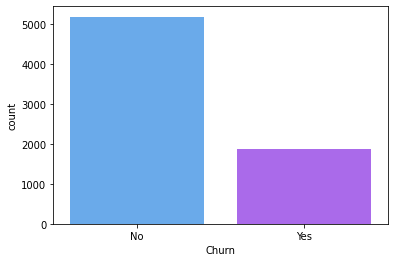

In [12]:
sns.countplot(data=df,x='Churn',palette='cool')

Percentage of ppl opting out

In [13]:
numretained = df[df.Churn == 'No'].shape[0]
numchurned = df[df.Churn == 'Yes'].shape[0]
# print the percentage of customers that stayed
print(numretained/(numretained + numchurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numchurned/(numretained + numchurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


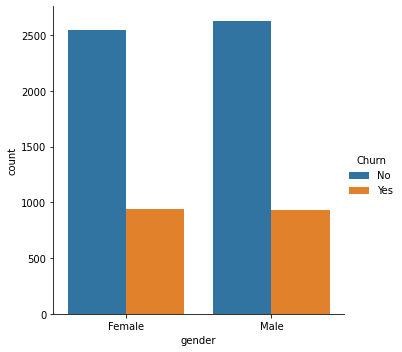

In [14]:
sns.catplot(data=df,x='gender',hue='Churn',kind='count')

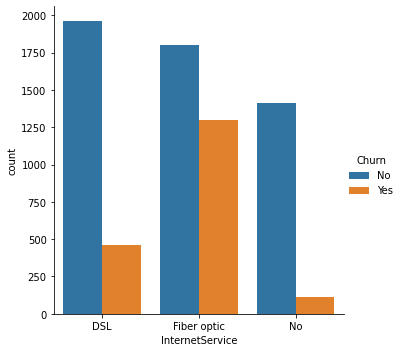

In [15]:
sns.catplot(data=df,x='InternetService',hue='Churn',kind='count')

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

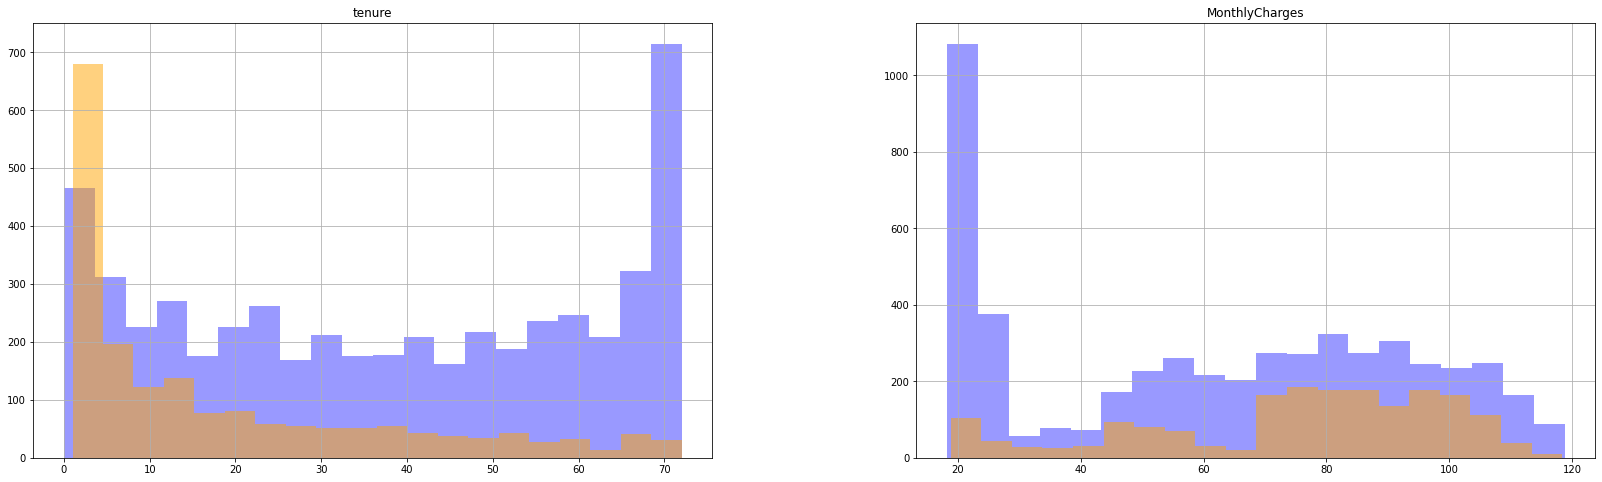

In [16]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig,ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.4,ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5,ax=ax)

In [17]:
df1 = df.drop(columns=['customerID']) #Let's drop customerID column to feed the ML model

In [18]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Importing Machine Learning 

In [19]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
#Convert all the non-numeric columns to numeric
for column in df1.columns:
  if df1[column].dtype == np.number:
    continue
  df1[column] = LabelEncoder().fit_transform(df1[column])

C:\Users\Srinivas\AppData\Local\Temp/ipykernel_28280/2156904570.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df1[column].dtype == np.number:
C:\Users\Srinivas\AppData\Local\Temp/ipykernel_28280/2156904570.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df1[column].dtype == np.number:
C:\Users\Srinivas\AppData\Local\Temp/ipykernel_28280/2156904570.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df1[column].dtype == np.number:
C:\Users\Srinivas\AppData\Local\Temp/ipykernel_28280/2156904570.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df1[

In [31]:
df1.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [32]:
#split data into X and Y and convert x from DF to series
x=df1.drop(columns='Churn',axis=1)
y=df1['Churn']
x = StandardScaler().fit_transform(x)
#y = StandardScaler().fit_transform(y)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x_train.shape

(5634, 19)

In [35]:
#Once the data is splitted let's Train the model

In [36]:
logreg =LogisticRegression()

logreg.fit(x_train,y_train)

LogisticRegression()

In [37]:
#Predicting on the test data

In [38]:
ypred = logreg.predict(x_test)

In [39]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
lr_conf_matrix=confusion_matrix(y_test,ypred)
lr_acc_score=accuracy_score(y_test,ypred)

In [42]:
lr_conf_matrix

array([[940,  96],
       [163, 210]], dtype=int64)

In [43]:
print("The accuracy is ",lr_acc_score*100, "%")

The accuracy is  81.61816891412349 %


In [49]:
a=df1.drop(columns='Churn',axis=1)
a.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [50]:
t1=a.loc[7034:7034]
t1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7034,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [51]:
# Predict output using the model
user_pred = logreg.predict(t1)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_pred_binary = 1 if user_pred == -1 else 0

if user_pred_binary == 1:
    print("Yes")
else:
    print("NO")

NO


C:\Users\Srinivas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


We can use the ML model to predict on the behaviour of the customer # we need to enter the data in numeric format 

In [ ]:
# Relevant features used during training
relevant_features = ['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges',
]
# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)